# Experiment 6
## Demonstration of clustering on dataset of your choice using K-Means algorithm in Python.


**K-Means Clustering:**

- **Objective**: Partition data into 'k' clusters to minimize the sum of squared distances (Euclidean distance) from data points to their cluster center.

- **Algorithm**:
  1. Initialize 'k' cluster centers randomly or using some heuristic.
  2. Assign each data point to the nearest cluster center.
  3. Recalculate the cluster centers as the mean of data points in each cluster.
  4. Repeat steps 2 and 3 until convergence (centers no longer change significantly) or for a fixed number of iterations.

- **Formula** (Euclidean Distance):
  - The distance between a data point 'x' and a cluster center 'c' is calculated as:
    - ` d(x, c) = sqrt(sum_{i=1}^{n} (x_i - c_i)^2) `
     <br> where:
    - `(d(x, c))` is the distance between point 'x' and center 'c'.
    - `(x_i)` and `(c_i)` are the coordinates of 'x' and 'c' in the 'i'-th dimension.
    - 'n' is the number of dimensions.

- **Initialization Methods**: Common methods include random initialization and K-Means++ which aims for more even cluster initialization.

- **Choosing 'k'**: The number of clusters 'k' is typically chosen using methods like the Elbow Method or the Silhouette Score.

- **Convergence**: K-Means may converge to a local minimum. Running the algorithm multiple times with different initializations can mitigate this issue.

- **Applications**: Used in various fields, including image compression, customer segmentation, and anomaly detection.

- **Strengths**:
  - Simplicity and efficiency.
  - Works well with large datasets.
  - Scalable to high dimensions.

- **Limitations**:
  - Sensitive to initializations.
  - Assumes clusters are spherical and equally sized.
  - May not perform well with non-globular clusters or varying cluster densities.

- **Variants**: K-Means++, Mini-Batch K-Means, and Hierarchical K-Means are variations of the algorithm.

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## K-Means Clustering on Mall Customers Dataset.

In [ ]:
# Loading csv file
df = pd.read_csv("/content/Mall_Customers.csv")
# Printing Dataset
print("Dataframe is:\n")
print(df)

Dataframe is:

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [ ]:
# Importing
# Defining the number of clusters (we should choose an appropriate value)
# Here we define the number of cluster that our algorithm should create in the dataset
num_clusters = 2

# Creating a KMeans instance with the specified number of clusters
# Importing the algorithm
kmeans = KMeans(n_clusters=num_clusters)

In [ ]:
# Since the dataset contains a string value column we need to drop it
# Also customer id is of no use currently so we can remove it as well
df = df.drop(columns = {'Gender'}, axis =1)

In [ ]:
# Fit the KMeans model to data
# Training data
kmeans.fit(df)

# Getting the cluster labels and cluster centers
# Labels refers to the label in which the data point is clustered or in other words it occurs
labels = kmeans.labels_
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Creating a new data point to check algorithm
new_data_point = [[3,20,15,32]]

# Predicting the cluster label for the new data point
cluster_label = kmeans.predict(new_data_point)

# Interpret the cluster label based on your analysis
print(f"The new data point belongs to Cluster {cluster_label[0]}")

The new data point belongs to Cluster 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


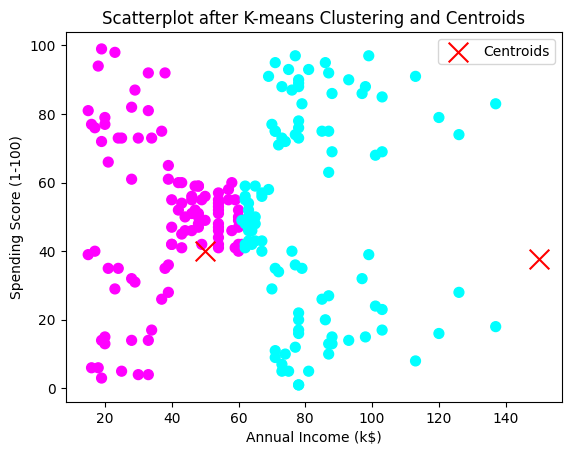

In [ ]:
# Create a scatter plot of data points colored by their cluster labels
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, cmap='cool', s=50)
# Plot cluster centers as red 'X' marks
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')

# Add labels and legend
plt.title('Scatterplot after K-means Clustering and Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

## K-Means Clustering on Iris Dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


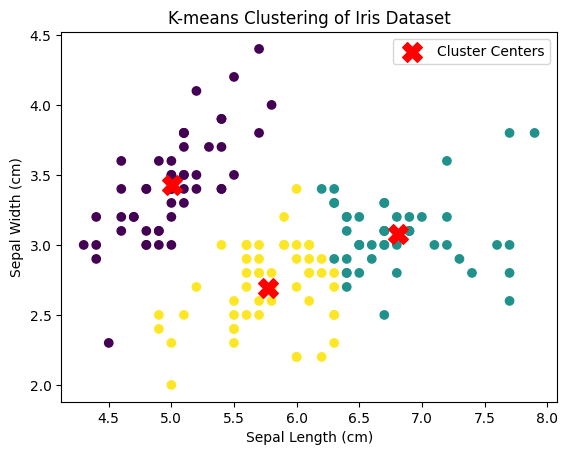

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Select two features for simplicity and visualization
X = X[['sepal length (cm)', 'sepal width (cm)']]

# Instantiate the K-means model with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Add cluster labels to the original data
X['Cluster'] = labels

# Visualize the clusters
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.title('K-means Clustering of Iris Dataset')
plt.show()